#Credit Card Fraud Detection

#What is Credit Card Fraud?

Credit card fraud is when someone uses another person's credit card or account information to make unauthorized purchases or access funds through cash advances. Credit card fraud doesn’t just happen online; it happens in brick-and-mortar stores, too. As a business owner, you can avoid serious headaches – and unwanted publicity – by recognizing potentially fraudulent use of credit cards in your payment environment

#Problem Statement:
The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

#Why does class imbalanced affect model performance?
In general, we want to maximize the recall while capping FPR (False Positive Rate), but you can classify a lot of charges wrong and still maintain a low FPR because you have a large number of true negatives.
This is conducive to picking a relatively low threshold, which results in the high recall but extremely low precision.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Datasets/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
new_data = data

In [ ]:
#lets check is any null values
new_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

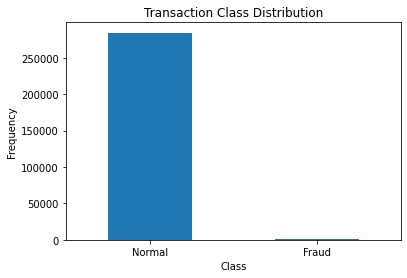

In [ ]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(new_data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

Determine the number of fraud and valid transactions in the entire dataset.

In [ ]:
fraud = new_data[new_data['Class']==1]
normal = new_data[new_data['Class']==0]

In [ ]:
print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


How different are the amount of money used in different transaction classes?

In [ ]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


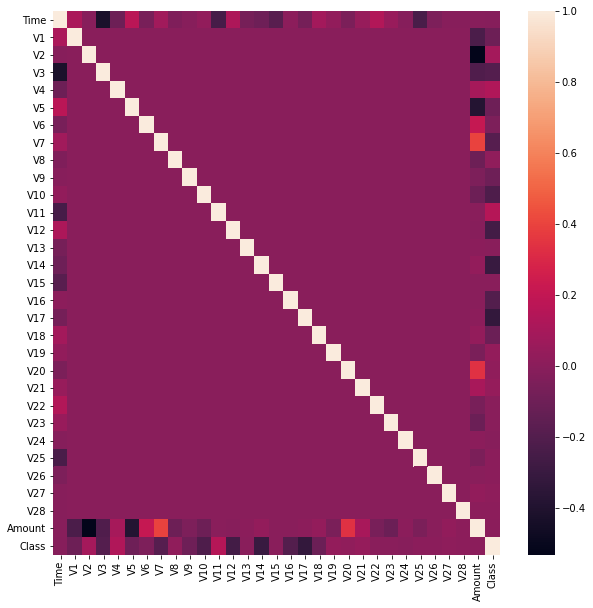

In [ ]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=new_data.corr())
plt.show();


### Intitially
Step1 -We Will Create an ANN and solve this problem(ROC AUC) 

Step2- We will use some Weights handling techniques to solve this imbalanced then we create
The ANN

In [ ]:
len(new_data.columns)

31

In [ ]:
X=new_data.iloc[:,1:30]
y=new_data.iloc[:,-1]

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
train_x ,test_x ,train_y,test_y = train_test_split(X,y,test_size =0.3 ,random_state = 0)

In [ ]:
train_y.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [ ]:
#step 1

import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
print(len(X.columns))

29


In [ ]:
n_inputs = 29

In [ ]:
#Define Simple Model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50,input_dim = n_inputs,activation='relu',kernel_initializer='he_uniform'))
#define output layer
model.add(Dense(1,activation="sigmoid"))
#Define loss and optimizer
model.compile(loss= 'binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit(train_x,train_y,epochs = 10)

Epoch 1/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0258 - accuracy: 0.9983
Epoch 2/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0173 - accuracy: 0.9991
Epoch 3/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0139 - accuracy: 0.9991
Epoch 4/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0118 - accuracy: 0.9993
Epoch 5/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0106 - accuracy: 0.9993
Epoch 6/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0097 - accuracy: 0.9993
Epoch 7/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0104 - accuracy: 0.9993
Epoch 8/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0110 - accuracy: 0.9993
Epoch 9/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0077 - accuracy: 0.9993
Epoch 10/10
6231/6231 [==============================] - 14s 2ms/step - l

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict(test_x)
print(roc_auc_score(test_y,y_pred))

0.9352490151941475


In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_y, y_pred.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, y_pred.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, y_pred.round())
print('F1 score: %f' % f1)
cm = confusion_matrix(test_y, y_pred.round())
print("Confusion Matrix : ") # Horizontal Actual ,Vertical Prediction 
print(cm)

Precision: 0.852113
Recall: 0.823129
F1 score: 0.837370
Confusion Matrix : 
[[85275    21]
 [   26   121]]


#Weighted Neural Network With Keras

Define Weights

Fit the model with thos specific weights

In [ ]:
weights_assigned={0:1,1:550}

In [ ]:
#Define Simple Model
model1 = Sequential()
# define first hidden layer and visible layer
model1.add(Dense(50,input_dim = n_inputs,activation='relu',kernel_initializer='he_uniform'))
#define output layer
model1.add(Dense(1,activation="sigmoid"))
#Define loss and optimizer
model1.compile(loss= 'binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model1.fit(train_x,train_y,epochs = 10,class_weight=weights_assigned)

Epoch 1/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.9159 - accuracy: 0.8515
Epoch 2/10
6231/6231 [==============================] - 16s 2ms/step - loss: 2.5245 - accuracy: 0.9035
Epoch 3/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.5310 - accuracy: 0.9101
Epoch 4/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.2965 - accuracy: 0.9157
Epoch 5/10
6231/6231 [==============================] - 15s 2ms/step - loss: 1.9997 - accuracy: 0.9283
Epoch 6/10
6231/6231 [==============================] - 15s 2ms/step - loss: 1.8908 - accuracy: 0.9293
Epoch 7/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.4852 - accuracy: 0.9205
Epoch 8/10
6231/6231 [==============================] - 15s 2ms/step - loss: 2.1905 - accuracy: 0.9310
Epoch 9/10
6231/6231 [==============================] - 15s 2ms/step - loss: 1.8441 - accuracy: 0.9393
Epoch 10/10
6231/6231 [==============================] - 15s 2ms/step - l

In [ ]:
y_pred1=model1.predict(test_x)
roc_auc_score(test_y,y_pred1)

0.9641298345449604

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_y, y_pred1.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, y_pred1.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, y_pred1.round())
print('F1 score: %f' % f1)
cm = confusion_matrix(test_y, y_pred1.round())
print("Confusion Matrix : ") # Horizontal Actual ,Vertical Prediction 
print(cm)

Precision: 0.047247
Recall: 0.904762
F1 score: 0.089804
Confusion Matrix : 
[[82614  2682]
 [   14   133]]


# Undersampling

#Over sampling vs. under sampling

When one class of data is the underrepresented minority class in the data sample, over sampling techniques maybe used to duplicate these results for a more balanced amount of positive results in training. Over sampling is used when the amount of data collected is insufficient. A popular over sampling technique is SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic samples by randomly sampling the characteristics from occurrences in the minority class.

Conversely, if a class of data is the overrepresented majority class, under sampling may be used to balance it with the minority class. Under sampling is used when the amount of collected data is sufficient. Common methods of under sampling include cluster centroids and Tomek links, both of which target potential overlapping characteristics within the collected data sets to reduce the amount of majority data.

In both over sampling and under sampling, simple data duplication is rarely suggested. Generally, over sampling is preferable as under sampling can result in the loss of important data. Under sampling is suggested when the amount of data collected is larger than ideal and can help data mining tools to stay within the limits of what they can effectively process.

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state = 0)
x_res , y_res = nm.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
x_res.shape

(984, 29)

In [ ]:
y_res.shape

(984,)

In [ ]:
from collections import Counter

In [ ]:
print("Original Dataset shape :{}".format(Counter(y)))
print("After Resampling Dataset shape :{}".format(Counter(y_res)))

Original Dataset shape :Counter({0: 284315, 1: 492})
After Resampling Dataset shape :Counter({0: 492, 1: 492})


In [ ]:
train_X ,test_X ,train_Y,test_Y = train_test_split(x_res,y_res,test_size =0.3 ,random_state = 0)

In [ ]:
#Define Simple Model
model2 = Sequential()
# define first hidden layer and visible layer
model2.add(Dense(50,input_dim = n_inputs,activation='relu',kernel_initializer='he_uniform'))
#define output layer
model2.add(Dense(1,activation="sigmoid"))
#Define loss and optimizer
model2.compile(loss= 'binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model2.fit(train_X,train_Y,epochs = 10)

Epoch 1/10
22/22 [==============================] - 0s 2ms/step - loss: 0.9598 - accuracy: 0.8081
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.9593
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9724
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.9695
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9738
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9753
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9767
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9811
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9811
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9826


In [ ]:
y_pred2=model2.predict(test_X)
roc_auc_score(test_Y,y_pred2)

0.9936538373738757

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_Y, y_pred2.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_Y, y_pred2.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_Y, y_pred2.round())
print('F1 score: %f' % f1)
cm = confusion_matrix(test_Y, y_pred2.round())
print("Confusion Matrix : ") # Horizontal Actual ,Vertical Prediction 
print(cm)

Precision: 1.000000
Recall: 0.899329
F1 score: 0.946996
Confusion Matrix : 
[[147   0]
 [ 15 134]]


# Oversampling

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x_res_smk , y_res_smk = smk.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_res_smk.shape

(568630, 29)

In [ ]:
y_res_smk.shape

(568630,)

In [ ]:
print("Original Dataset shape :{}".format(Counter(y)))
print("After Resampling Dataset shape :{}".format(Counter(y_res_smk)))

Original Dataset shape :Counter({0: 284315, 1: 492})
After Resampling Dataset shape :Counter({0: 284315, 1: 284315})


In [ ]:
train_X_smk ,test_X_smk ,train_Y_smk,test_Y_smk = train_test_split(x_res_smk,y_res_smk,test_size =0.3 ,random_state = 0)

In [ ]:
#Define Simple Model
model3 = Sequential()
# define first hidden layer and visible layer
model3.add(Dense(50,input_dim = n_inputs,activation='relu',kernel_initializer='he_uniform'))
#define output layer
model3.add(Dense(1,activation="sigmoid"))
#Define loss and optimizer
model3.compile(loss= 'binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model3.fit(train_X_smk,train_Y_smk,epochs = 10)

Epoch 1/10
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0950 - accuracy: 0.9764
Epoch 2/10
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0431 - accuracy: 0.9915
Epoch 3/10
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0317 - accuracy: 0.9943
Epoch 4/10
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0260 - accuracy: 0.9954
Epoch 5/10
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0229 - accuracy: 0.9960
Epoch 6/10
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0177 - accuracy: 0.9968
Epoch 7/10
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0165 - accuracy: 0.9970
Epoch 8/10
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0171 - accuracy: 0.9972
Epoch 9/10
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0137 - accuracy: 0.9975
Epoch 10/10
12439/12439 [==============================

In [ ]:
y_pred3=model3.predict(test_X_smk)
roc_auc_score(test_Y_smk,y_pred3)

0.9997282177538358

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_Y_smk, y_pred3.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_Y_smk, y_pred3.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_Y_smk, y_pred3.round())
print('F1 score: %f' % f1)
cm = confusion_matrix(test_Y_smk, y_pred3.round())
print("Confusion Matrix : ") # Horizontal Actual ,Vertical Prediction 
print(cm)

Precision: 0.995036
Recall: 0.999672
F1 score: 0.997349
Confusion Matrix : 
[[84746   426]
 [   28 85389]]
